<a href="https://colab.research.google.com/github/Chromatina/su-mt4007/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Task 1

In [3]:
df = pd.read_csv("covtype.csv")
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


# Task 2

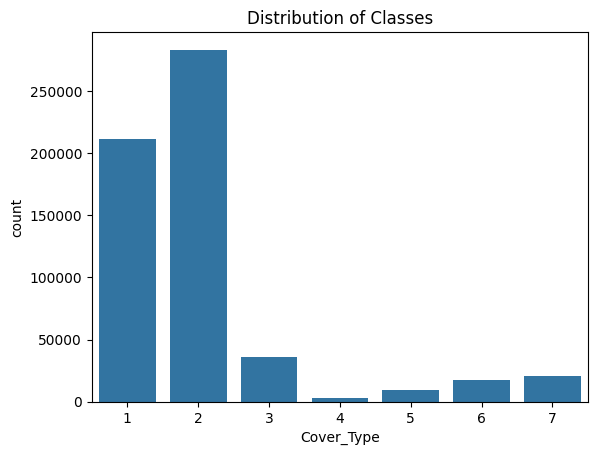

In [4]:
sns.countplot(x="Cover_Type", data=df)
plt.title("Distribution of Classes")
plt.show()

From the plot above we see that class 1 and 2 represent the majority of the data, in this case class imbalance is an issue since the network could simply ignore the other classes and only make predictions on the first two. Since the first two classes represent about 85% of the data (see print-out below), the model would be correct 85% of the time (if it correctly classifies these two classes of course) but it would be terrible at classifiying new data into the other five classes. To summarise, the model would ignore the majority of our classes and still make good predictions, although faulty predictions. **FRÅGA OM DET JAG SKRIVIT!!!**

In [5]:
class_proportions = df["Cover_Type"].value_counts(normalize=True)
print("Class 1 and 2 represent", round((class_proportions[1] + class_proportions[2]) * 100, 1), "% of the data.")

Class 1 and 2 represent 85.2 % of the data.


# Task 3

We standardize all the features but not the targets in the column "Cover_Type".

In [6]:
features = df.drop("Cover_Type", axis=1)
mean = np.mean(features, axis=0)
std = np.std(features, axis=0)
standardized_features = (features - mean) / std
standardized_df = standardized_features.assign(Cover_Type=df["Cover_Type"])
standardized_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,2
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,-2.012130,-0.023740,0.787408,-0.867697,-0.504653,-1.437962,1.040496,0.692069,-0.640851,-0.863386,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581008,-2.029988,-0.032675,0.653865,-0.952383,-0.590424,-1.446299,1.040496,0.692069,-0.614724,-0.857345,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581009,-2.047847,0.029873,0.386780,-0.985317,-0.676194,-1.449506,0.891075,0.894409,-0.327327,-0.850548,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3
581010,-2.054990,0.128163,0.119694,-0.985317,-0.710502,-1.449506,0.666942,1.096749,0.012325,-0.842997,...,-0.315238,-0.290284,-0.05273,-0.057143,-0.014313,-0.022653,-0.165956,-0.156014,-0.123654,3


# Task 4

Standardization is important because if some our inputs are significantly larger than the rest, then multiplying them by the weights will result in much larger outputs and thus uneven performance of our model. The weights for the larger inputs (features) will affect the loss much more than the weights for the inputs with much smaller scale. We should always standardize our dataset after splitting the data. This is because if we standardize the data before splitting it, then the training data will have "seen" the mean and standard deviation of the whole dataset which includes the testing and validation sets. The testing set should be completely new and unseen to the training set and if this is not the case, it could lead to the models performance seeming better than it actually is.

# Task 5

In [7]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

# We use stratify=y to ensure the imbalanced classes are distributed evenly
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

scaler = StandardScaler()

# We "fit" only on the training data to learn the mean and std dev
X_train_scaled = scaler.fit_transform(X_train)

# We "transform" validation and test sets using the training parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Task 6



*   Depth:
*   Width:
*   Activation function: We choose the ReLU activation function since it is computationally efficient and it solves the vanishing gradient problem where the gradient of other activation functions such as sigmod, approaches zero for large positive inputs.   
*   Cost function: We use cross-entropy as our cost function as it is measures the difference between the networks guesses and the actual class labels whilst greatly punishing confident although wrong predictions. Furthermore, it avoids slow learning by using a logarithmic function which increases the gradients when the errors are high.
*   Output function: We use the softmax function on our last layer to transform the logits (the output of the output layer) to probabilities so that we humans can interpret the results better. The softmax function is embedded in the CrossEntropyLoss() function from PyTorch and is therefore not visible in the code.
*   Parameter initialization: We use Kaiming initialization to initialize our weights (default in PyTorch) since if we would initialize our weights to be zero for example, then they would all learn the same thing and the model would never improve. Kaiming ensures that the weights are generated from a normal distribution with mean zero and a standard deviation that depends on the number of inputs to that node. This method is also the standard one if the network is using ReLU as the activation function for the hidden layers.
*   Training algorithm: We use Adam ...


In [12]:
# This checks if a GPU is available; if not, it stays on CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Prepare the labels (subtract 1 for 0-6 indexing)
y_train_np = y_train.values - 1
y_val_np = y_val.values - 1

# Convert directly to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.long)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_np, dtype=torch.long)

# Create Datasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=1024)

Now using: cuda


In [60]:
class CovertypeNet(nn.Module):
    def __init__(self, input_size):
        super(CovertypeNet, self).__init__()
        # Define the layers
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 7) # 7 classes
        self.relu = nn.ReLU()

    def forward(self, x):
        # Define the data flow
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.layer5(x)
        return x

# Initialize the model
model = CovertypeNet(input_size=X_train_scaled.shape[1]).to(device)

In [ ]:
# Calculate weights
class_counts = np.bincount(y_train_np)
weights = 1.0 / class_counts
weights = torch.tensor(weights, dtype=torch.float32)
weights = weights.to(device) # Move weights to GPU

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics for plotting
train_errors, val_errors = [], []

epochs = 800
for epoch in range(epochs):
    # --- TRAINING ---
    model.train()
    train_correct, train_total = 0, 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate Accuracy
        _, predicted = torch.max(outputs.data, 1) # Get the index of the max logit
        train_total += batch_y.size(0)
        train_correct += (predicted == batch_y).sum().item()

    train_errors.append(100 * (1 - train_correct / train_total)) # Error = 1 - Accuracy

    # --- VALIDATION ---
    model.eval()
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            _, predicted = torch.max(outputs.data, 1)
            val_total += batch_y.size(0)
            val_correct += (predicted == batch_y).sum().item()

    val_errors.append(100 * (1 - val_correct / val_total))

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {100 * (1 - train_correct / train_total):.4f} | Val Loss: {100 * (1 - val_correct / val_total):.4f}")

Epoch [1/800] | Train Loss: 44.7201 | Val Loss: 36.2713
Epoch [2/800] | Train Loss: 36.3573 | Val Loss: 37.3660
Epoch [3/800] | Train Loss: 33.8537 | Val Loss: 29.6415
Epoch [4/800] | Train Loss: 32.2545 | Val Loss: 30.4917
Epoch [5/800] | Train Loss: 30.7886 | Val Loss: 28.7861
Epoch [6/800] | Train Loss: 29.4807 | Val Loss: 29.4539
Epoch [7/800] | Train Loss: 28.2232 | Val Loss: 29.8084
Epoch [8/800] | Train Loss: 27.2736 | Val Loss: 25.9875
Epoch [9/800] | Train Loss: 26.1135 | Val Loss: 26.2353
Epoch [10/800] | Train Loss: 25.2127 | Val Loss: 23.4213
Epoch [11/800] | Train Loss: 24.3593 | Val Loss: 24.7087
Epoch [12/800] | Train Loss: 23.6831 | Val Loss: 24.1820
Epoch [13/800] | Train Loss: 22.8847 | Val Loss: 22.8585
Epoch [14/800] | Train Loss: 21.9923 | Val Loss: 20.7879
Epoch [15/800] | Train Loss: 21.5828 | Val Loss: 21.8654
Epoch [16/800] | Train Loss: 21.1446 | Val Loss: 20.3938
Epoch [17/800] | Train Loss: 20.5239 | Val Loss: 19.6193
Epoch [18/800] | Train Loss: 20.1941 | V

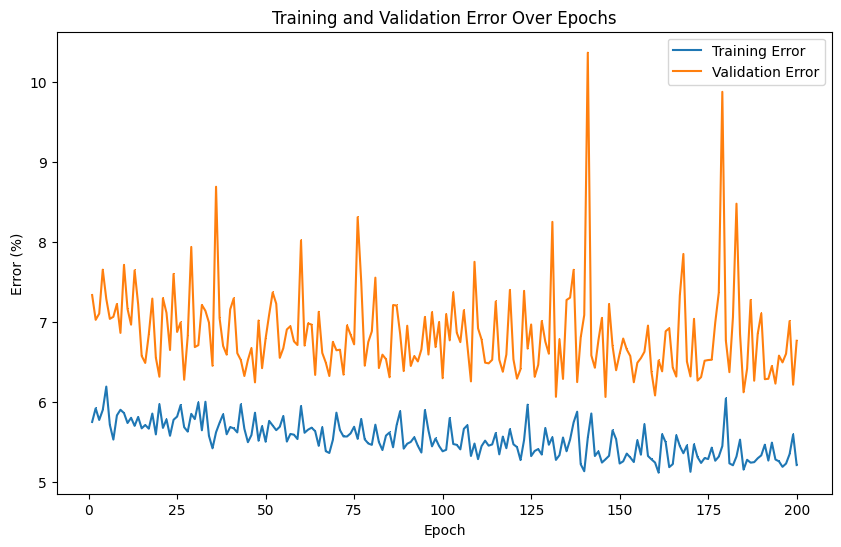

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_errors, label="Training Error", marker=",")
plt.plot(range(1, epochs + 1), val_errors, label="Validation Error", marker=",")

plt.title("Training and Validation Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [26]:
# Calculate weights
class_counts = np.bincount(y_train_np)
weights = 1.0 / class_counts
weights = torch.tensor(weights, dtype=torch.float32)
weights = weights.to(device) # Move weights to GPU

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics for plotting
train_losses = []
val_losses = []

epochs = 400
for epoch in range(epochs):
    # --- TRAINING PHASE ---
    model.train()
    running_train_loss = 0.0
    for batch_X, batch_y in train_loader:
        # Move batch to GPU
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad() # Clear previous gradients
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward() # Compute new gradients
        optimizer.step() # Update weights
        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- VALIDATION PHASE ---
    model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient calculation (saves memory/time)
        for batch_X, batch_y in val_loader:
            # Move batch to GPU
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

Epoch [1/400] | Train Loss: 0.8591 | Val Loss: 0.6566
Epoch [2/400] | Train Loss: 0.6080 | Val Loss: 0.5814
Epoch [3/400] | Train Loss: 0.5635 | Val Loss: 0.5540
Epoch [4/400] | Train Loss: 0.5365 | Val Loss: 0.5305
Epoch [5/400] | Train Loss: 0.5155 | Val Loss: 0.5188
Epoch [6/400] | Train Loss: 0.4936 | Val Loss: 0.4983
Epoch [7/400] | Train Loss: 0.4766 | Val Loss: 0.4858
Epoch [8/400] | Train Loss: 0.4645 | Val Loss: 0.4638
Epoch [9/400] | Train Loss: 0.4519 | Val Loss: 0.4580
Epoch [10/400] | Train Loss: 0.4396 | Val Loss: 0.4375
Epoch [11/400] | Train Loss: 0.4294 | Val Loss: 0.4325
Epoch [12/400] | Train Loss: 0.4182 | Val Loss: 0.4218
Epoch [13/400] | Train Loss: 0.4104 | Val Loss: 0.4068
Epoch [14/400] | Train Loss: 0.4004 | Val Loss: 0.4012
Epoch [15/400] | Train Loss: 0.3932 | Val Loss: 0.4072
Epoch [16/400] | Train Loss: 0.3870 | Val Loss: 0.3986
Epoch [17/400] | Train Loss: 0.3792 | Val Loss: 0.3966
Epoch [18/400] | Train Loss: 0.3714 | Val Loss: 0.3758
Epoch [19/400] | Tr

# Task 7

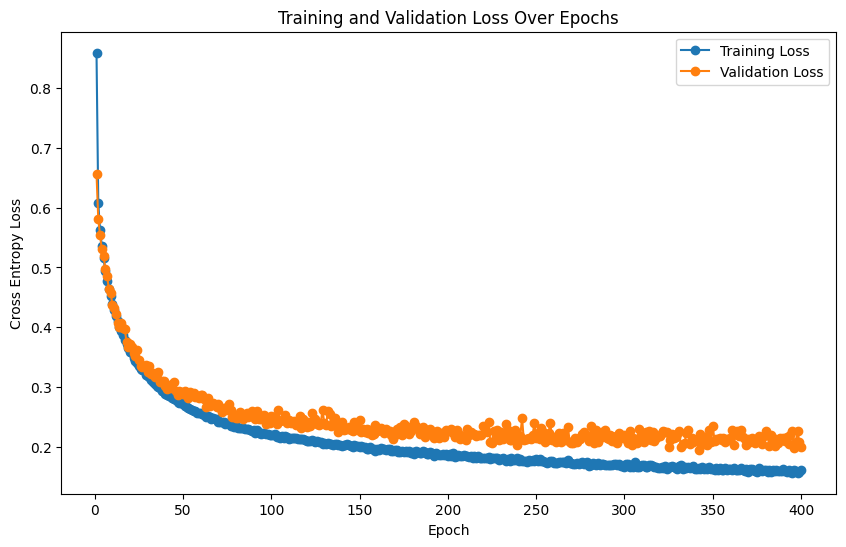

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", marker="o")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", marker="o")

plt.title("Training and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.show()

In [13]:
Epoch [1/10] | Train Loss: 0.9057 | Val Loss: 0.6858
Epoch [2/10] | Train Loss: 0.6344 | Val Loss: 0.6051
Epoch [3/10] | Train Loss: 0.5800 | Val Loss: 0.5704
Epoch [4/10] | Train Loss: 0.5475 | Val Loss: 0.5430
Epoch [5/10] | Train Loss: 0.5254 | Val Loss: 0.5168
Epoch [6/10] | Train Loss: 0.5080 | Val Loss: 0.5075
Epoch [7/10] | Train Loss: 0.4932 | Val Loss: 0.4994
Epoch [8/10] | Train Loss: 0.4799 | Val Loss: 0.4795
Epoch [9/10] | Train Loss: 0.4698 | Val Loss: 0.4659
Epoch [10/10] | Train Loss: 0.4583 | Val Loss: 0.4634

self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 7) # 7 classes


